# Multicollinearity

Multicollinearity arises when two or more independent variables in our regression are highly correlated; in the extreme, one of these variables can be a linear combination of the others, resulting in perfect multicollinearity. 

To illustrate the effects of multicollinearity, let's see the following regression:

$$
Y =\beta_1 + \beta_2 X + \mu
$$

Where $X$ contains a set of $k$ independent variables ($i=1, 2, ..., k$), where one of those is highly correlated to another, or several others.

We know that for the simple OLS regression the variance-covariance matrix is:

$$
var(\hat\beta)=\hat\sigma^2(X'X)^{-1}
$$

and

$$
(X'X)^{-1}=\frac{1}{|X'X|}adj(X'X)
$$

In cases of high correlation between explanatory variables the term $|X'X|$ tends to zero; in case of perfect collinearity $|X'X|=0$. One can instantly notice that this means that multicollinearity results in high variance for the estimators (and in some cases, these estimators would be impossible to determine). In an extreme case, perfect collinearity, one cannot determine the estimators associated with the matrix $X$, and the variance would be infinite. Multicollinearity ultimately results in high $R^2$ but low $t$ values; i.e. a significant model, but with non-significant estimators. 

Multicollinearity can present itself in different scenarios. For example, let's imagine that a researcher wants to determine if a person suffers or not from anemia and proposes the following regression:

$$
Anemina_i=\beta_1 +\beta_2Height_i + \beta_3Weight_i + \delta_i
$$

While it is logical to think one may suffer from anemia depending on one's height or weight, these two variables tend to be highly correlated, and thus may present multicollinearity when estimating the $\beta$ estimators.

Another case would be when an economist wants to predict how much a person consumes in a month. A possible model would be:

$$
Consume_i=\alpha_1 + \alpha_2Income_i + \alpha_3Wealth +\mu_i
$$

In this case too, one may suspect collinearity, given that wealth tends to increase with income.

***

### References
<a id="1">[1]</a> 
Gujarati, D. & D. Porter (2010). Econometría. Quinta Edicion, Mc Graw Hill.


In the following code, we analize how Python deals with the problem of multicollinearity.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pyreadr
import multiprocess
import hdmpy as hdm

In [37]:

np.random.seed(10)
mat = np.random.normal(0,4, size = (10,10))
mat.shape


(10, 10)

In [38]:
mat = pd.DataFrame(mat)

mat = mat.rename(columns = {0: 'col1', 1: 'col2', 2: 'col3', 3 : 'col4', 4: 'col5', 5: 'col6', 6: 'col7', 7 : 'col8', 8 : 'col9', 9: 'col10'})
mat

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,5.326346,2.861116,-6.181601,-0.033535,2.485344,-2.880342,1.062046,0.434194,0.017166,-0.698401
1,1.732105,4.812149,-3.860263,4.113096,0.914521,1.780550,-4.546409,0.540548,5.938148,-4.319220
2,-7.910913,-6.973489,1.064281,9.539869,4.494765,6.690489,0.396597,5.591986,-1.084992,2.452817
3,-1.069269,-2.197236,0.530833,-1.904568,5.233892,0.780053,1.600840,-1.350529,5.025889,-2.927878
4,2.640926,-1.403488,-3.757733,-1.957349,-3.218365,-0.850791,-1.356561,1.248680,2.260611,-0.589681
5,-0.103621,1.156377,-2.159516,2.832640,3.368899,0.814323,9.578815,3.669836,-0.449090,-1.448722
6,-0.928729,-2.006916,4.515141,-2.791240,-0.324489,-2.117184,4.184731,-5.674224,-1.449997,-0.487623
7,1.277426,1.843612,-0.863160,3.956290,1.259015,9.870604,-6.033286,2.482403,-4.180530,-3.192035
8,7.940338,6.979257,-7.424742,-0.891095,-0.263391,-8.526848,-0.195322,1.573365,0.869061,-7.977575
9,4.430833,0.978176,-0.247648,-3.015572,2.847836,3.673077,-1.928373,0.358350,3.307994,-7.818048


In [39]:
mat['col1'] = mat['col2'] + mat['col3']+mat['col4']
mat

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,-3.354021,2.861116,-6.181601,-0.033535,2.485344,-2.880342,1.062046,0.434194,0.017166,-0.698401
1,5.064983,4.812149,-3.860263,4.113096,0.914521,1.780550,-4.546409,0.540548,5.938148,-4.319220
2,3.630661,-6.973489,1.064281,9.539869,4.494765,6.690489,0.396597,5.591986,-1.084992,2.452817
3,-3.570971,-2.197236,0.530833,-1.904568,5.233892,0.780053,1.600840,-1.350529,5.025889,-2.927878
4,-7.118570,-1.403488,-3.757733,-1.957349,-3.218365,-0.850791,-1.356561,1.248680,2.260611,-0.589681
5,1.829501,1.156377,-2.159516,2.832640,3.368899,0.814323,9.578815,3.669836,-0.449090,-1.448722
6,-0.283015,-2.006916,4.515141,-2.791240,-0.324489,-2.117184,4.184731,-5.674224,-1.449997,-0.487623
7,4.936742,1.843612,-0.863160,3.956290,1.259015,9.870604,-6.033286,2.482403,-4.180530,-3.192035
8,-1.336580,6.979257,-7.424742,-0.891095,-0.263391,-8.526848,-0.195322,1.573365,0.869061,-7.977575
9,-2.285044,0.978176,-0.247648,-3.015572,2.847836,3.673077,-1.928373,0.358350,3.307994,-7.818048


We estimate the inverse matrix with the numpy package. 

In [40]:
inv_mat = pd.DataFrame(np.linalg.inv(mat.values))
inv_mat

,0,1,2,3,4,5,6,7,8,9
0,1.073208e+15,2.355234e+14,4.924536e+14,-1.719286e+15,-3.823451e+14,-2.226741e+14,2.840340e+14,-9.800836e+14,-5.771933e+14,1.613903e+15
1,-1.073208e+15,-2.355234e+14,-4.924536e+14,1.719286e+15,3.823451e+14,2.226741e+14,-2.840340e+14,9.800836e+14,5.771933e+14,-1.613903e+15
2,-1.073208e+15,-2.355234e+14,-4.924536e+14,1.719286e+15,3.823451e+14,2.226741e+14,-2.840340e+14,9.800836e+14,5.771933e+14,-1.613903e+15
3,-1.073208e+15,-2.355234e+14,-4.924536e+14,1.719286e+15,3.823451e+14,2.226741e+14,-2.840340e+14,9.800836e+14,5.771933e+14,-1.613903e+15
4,5.078300e-02,-5.780492e-02,-2.997312e-03,1.419184e-01,-1.156373e-01,-3.303223e-02,-6.988384e-02,2.724990e-02,2.130330e-02,-4.035242e-02
5,5.361908e-03,2.548599e-02,-4.774953e-02,2.172279e-02,6.310420e-02,5.642007e-02,1.306392e-02,7.464966e-02,-7.172096e-02,-1.099898e-02
6,-1.024384e-02,1.615169e-02,-2.044326e-02,-1.042685e-02,4.047006e-02,9.726038e-02,4.697437e-02,-1.966974e-03,-2.318526e-02,-1.006083e-02
7,1.509691e-02,-5.898676e-02,5.741206e-02,-2.049909e-01,-9.146463e-02,3.301112e-03,-1.561160e-01,-1.602782e-01,-2.714498e-02,2.351847e-01
8,1.534320e-02,9.367885e-02,9.900276e-03,-6.572233e-02,1.222933e-03,7.899228e-03,-2.467534e-02,-1.180052e-01,-7.217842e-02,9.640873e-02
9,-1.593677e-02,-1.820362e-02,-7.438004e-02,1.270167e-01,-1.389852e-02,1.149714e-02,-1.052855e-01,4.010920e-02,-3.854722e-02,-1.588903e-01


We obtained some huge numbers, which would be consistent with an $almost$ $0$ determinant. To be sure we then estimate the determinant.

In [41]:
X = mat.values
det_X = np.linalg.det(X)
det_X

6.97213838088551e-08

The Estimated Determinant coverges to $0$ as we would expect for a singular matrix. Now let's  estimate Beta for a given random $Y$ vector manually just to show how multicollinearity isn't directly recognized by python.

In [42]:
Y = np.random.normal( 0, 5, size = (10))

X_t = X.T


beta = X_t.dot(X)

beta = np.linalg.inv(beta)
beta = beta.dot(X_t.dot(Y))


beta = pd.DataFrame(beta)
beta



,0
0,0.311049
1,0.199741
2,-0.249013
3,-1.026072
4,0.879694
5,-0.349328
6,-0.490749
7,0.589466
8,-1.117965
9,0.251226


We obtained real values despite the collinearity problem! In contrast, this same excersise in R got us and error warning, indicating a singular matrix.

# Analyzing RCT data with Precision Adjustment

In this replication, we analyze the Pennsylvania re-employment bonus experiment, but this time we focus on the treatment group 2, the one that received a low bonus amount, had a long qualification period, and was offered a workshop.

In [43]:
## loading the data
Penn = pd.read_csv("data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
print(Penn.shape)

(13913, 24)


In [44]:
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [45]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


### Analazing the data

Here we analize how the variable _inuidur1_ (defined by the author as: a measure of length (in weeks) of the first spell of unemployment) for each control group. We can observe that both have similar distributions, meaning the individuals in the control and the treated group had similar periods of uninterrupted unemployment, which is consistent with a RCT, where there should be no difference between the treatment and control groups.

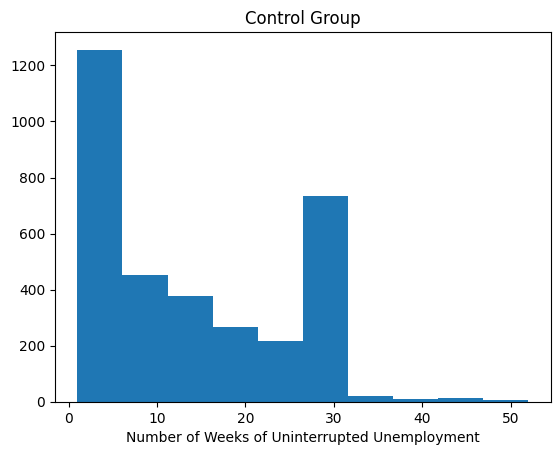

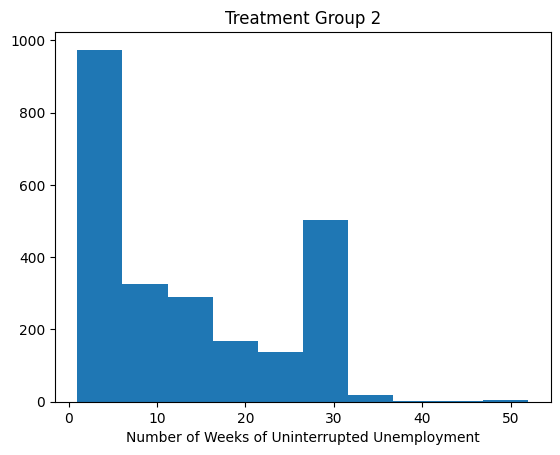

In [46]:
penn0=Penn[(Penn['tg']==0)]
penn2=Penn[(Penn['tg']==2)]

plt.hist(penn0['inuidur1'])
plt.xlabel('Number of Weeks of Uninterrupted Unemployment')
plt.title('Control Group')
plt.show()

plt.hist(penn2['inuidur1'])
plt.xlabel('Number of Weeks of Uninterrupted Unemployment')
plt.title('Treatment Group 2')
plt.show()

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D_{2} \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D_{2}$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously. Remind that we are focusing just on the type 2 Treatment.


We also consider interactive regression model:

$$
Y =  D_{2} \alpha_1 + D_{2} W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D_{2},W', D_{2}W')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment 2 on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

## Carry out covariate balance check

We check if control group is balanced to treatment group. We'll do this by estimating a Linear regression. If coefficients show no signifficance we would expect

We use the results we obtained from R since its easier.

## Regress treatment to all covariates

In [47]:
y = Penn[['T2']].reset_index( drop = True )

In [48]:
# Get data from R

result = pyreadr.read_r('data/m_reg.RData')    

X_vars = result['X1']
print(X_vars.shape)
print(y.shape)

(5782, 103)
(5782, 1)


In [49]:
X_vars.reindex(y.index)
model_results = sm.OLS( y, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     4.204
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           2.42e-39
Time:                        18:30:10   Log-Likelihood:                -4075.6
No. Observations:                5782   AIC:                             8357.
Df Residuals:                    5679   BIC:                             9043.
Df Model:                         102                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              0.5171 

C:\Anaconda\envs\renv\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 101
  warnings.warn('covariance of constraints does not have full '


# Model Specification
We use data from R.

In [50]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

# adding controls
# formula_cra = 'log_inuidur1 ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
# Omitted dummies: q1, nondurable, muld

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")

#getting data
# Get data from R 


result = pyreadr.read_r('data/ols_cra_reg.RData')

X_vars = result['X1']

ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_cl.summary())
print(ols_cra.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Wed, 22 Sep 2021   Prob (F-statistic):             0.0154
Time:                        18:30:11   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

C:\Anaconda\envs\renv\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  warnings.warn('covariance of constraints does not have full '


In [51]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

In [52]:
# Reset index to estimation
# Get data from R

result = pyreadr.read_r('data/ols_ira_reg.RData')
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:30:12   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Anaconda\envs\renv\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


## IRA using Lasso

In [53]:
import hdmpy

In [54]:
# Get data from R
result = pyreadr.read_r('data/rlasso_ira_reg.RData')
X_vars = result['S']

In [66]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])
rlasso_ira

,Coef.,Std.Err.,t,P>|t|
T2,-0.074573,0.032104,-2.322841,0.020188


### Results

In [56]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["$CL$", "$CRA$", "$IRA$", "$IRA Lasso$"], \
                      index = ["estimate","standard error"])
table2
table2.to_latex
print(table2.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      \$CL\$ &     \$CRA\$ &     \$IRA\$ &  \$IRA Lasso\$ \\
\midrule
estimate       & -0.078825 & -0.071207 & -0.069904 &    -0.074573 \\
standard error &  0.032509 &  0.032044 &  0.032076 &     0.032104 \\
\bottomrule
\end{tabular}



Treatment group 2 experiences an average **decrease** of about $7.4$ % in the length of unemployment spell.

Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors. 

Now we show if there´s heterogenity for the treatment effect between certain groups.

## Plotting coefficients
In this section, we interpret the effect of certain two-way interactions with the treatment over the period of unemployment.

In [82]:
import matplotlib.pyplot as plt
coefs_ira = np.zeros((4,4))

ols_ira.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.039     
Dependent Variable:    inuidur1            AIC:                   18664.2800
Date:                  2021-09-22 19:52    BIC:                   20016.7685
No. Observations:      5782                Log-Likelihood:        -9129.1   
Df Model:              202                 F-statistic:           35.02     
Df Residuals:          5579                Prob (F-statistic):    0.00      
R-squared:             0.073               Scale:                 1.4271    
----------------------------------------------------------------------------
                              Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
(Intercept)                   2.0557   0.0207 99.2430 0.0000  2.0151  2.0963
T2TRUE                       -0.0699   0.0321 -2.1793 0.0294 -0.1328 -0.0070
Xfemale                      -0.6663   0.4080 -1.6330 0.1025 -1.4662  0.1336
Xblack                       -0.8635   0.2969 -2.9079 0.0037 -1.4456 -0.2814
Xothrace                     -3.8177   0.9366 -4.0760 0.0000 -5.6538 -1.9815
Xfactor(dep)1                 0.0359   0.6477  0.0555 0.9558 -1.2338  1.3056
Xfactor(dep)2                 0.2118   0.4512  0.4693 0.6389 -0.6728  1.0963
Xq2                          -0.2546   0.4553 -0.5592 0.5760 -1.1473  0.6380
Xq3                          -0.6212   0.4550 -1.3655 0.1722 -1.5131  0.2707
Xq4                          -0.4799   0.4561 -1.0522 0.2928 -1.3741  0.4142
Xq5                          -0.3719   0.4539 -0.8193 0.4127 -1.2617  0.5179
Xq6                          -0.6770   0.4521 -1.4974 0.1343 -1.5634  0.2093
Xagelt35                     -0.6777   0.4094 -1.6555 0.0979 -1.4802  0.1248
Xagegt54                     -0.3041   0.7006 -0.4341 0.6643 -1.6776  1.0694
Xdurable                     -0.8380   0.5963 -1.4052 0.1600 -2.0071  0.3311
Xlusd                        -0.0995   0.2279 -0.4365 0.6625 -0.5463  0.3473
Xhusd                        -0.0626   0.2349 -0.2667 0.7897 -0.5232  0.3979
Xfemale:black                -0.2155   0.1505 -1.4317 0.1523 -0.5105  0.0796
Xfemale:othrace               0.5994   0.5626  1.0655 0.2867 -0.5034  1.7023
Xfemale:factor(dep)1         -0.1734   0.1419 -1.2223 0.2216 -0.4516  0.1047
Xfemale:factor(dep)2          0.2166   0.1263  1.7148 0.0864 -0.0310  0.4643
Xfemale:q2                    0.3919   0.4067  0.9636 0.3353 -0.4054  1.1891
Xfemale:q3                    0.6850   0.4063  1.6859 0.0919 -0.1116  1.4816
Xfemale:q4                    0.7214   0.4062  1.7761 0.0758 -0.0748  1.5176
Xfemale:q5                    0.5658   0.4048  1.3977 0.1623 -0.2278  1.3593
Xfemale:q6                    0.9082   0.4304  2.1100 0.0349  0.0644  1.7520
Xfemale:agelt35               0.1701   0.0951  1.7890 0.0737 -0.0163  0.3564
Xfemale:agegt54               0.2358   0.1601  1.4723 0.1410 -0.0782  0.5497
Xfemale:durable               0.0974   0.1376  0.7079 0.4791 -0.1724  0.3672
Xfemale:lusd                  0.0720   0.1065  0.6760 0.4991 -0.1368  0.2808
Xfemale:husd                  0.0610   0.1164  0.5236 0.6006 -0.1673  0.2892
Xblack:factor(dep)1           0.1090   0.2285  0.4771 0.6333 -0.3389  0.5569
Xblack:factor(dep)2          -0.2007   0.2285 -0.8785 0.3797 -0.6486  0.2472
Xblack:q2                     0.4267   0.3207  1.3306 0.1834 -0.2019  1.0553
Xblack:q3                     0.3299   0.3030  1.0890 0.2762 -0.2640  0.9239
Xblack:q4                     0.5443   0.3105  1.7529 0.0797 -0.0644  1.1531
Xblack:q5                     0.6597   0.3001  2.1985 0.0280  0.0714  1.2479
Xblack:agelt35                0.0830   0.1583  0.5241 0.6002 -0.2274  0.3934
Xblack:agegt54                0.4230   0.2547  1.6604 0.0969 -0.0764  0.9224
Xblack:durable                0.4681   0.2274  

In [83]:
coefs_ira[0,1] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfemale']
coefs_ira[1,1] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xblack']
coefs_ira[2,1] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xagelt35']
coefs_ira[3,1] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfactor(dep)1']


coefs_ira[0,2] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfemale'] - ols_ira.summary2().tables[1]['[0.025']['T2TRUE:Xfemale']
coefs_ira[1,2] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xblack'] - ols_ira.summary2().tables[1]['[0.025']['T2TRUE:Xblack']
coefs_ira[2,2] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xagelt35'] - ols_ira.summary2().tables[1]['[0.025']['T2TRUE:Xagelt35']
coefs_ira[3,2] =  ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfactor(dep)1'] - ols_ira.summary2().tables[1]['[0.025']['T2TRUE:Xfactor(dep)1']

coefs_ira[0,3] =  ols_ira.summary2().tables[1]['P>|t|']['T2TRUE:Xfemale']
coefs_ira[1,3] =  ols_ira.summary2().tables[1]['P>|t|']['T2TRUE:Xblack']
coefs_ira[2,3] =  ols_ira.summary2().tables[1]['P>|t|']['T2TRUE:Xagelt35']
coefs_ira[3,3] =  ols_ira.summary2().tables[1]['P>|t|']['T2TRUE:Xfactor(dep)1']

coefs_ira = pd.DataFrame(coefs_ira)

coefs_ira.loc[0,0] = 'T2:Female'
coefs_ira.loc[1,0] = 'T2:Black'
coefs_ira.loc[2,0] = 'T2:Agelt35'
coefs_ira.loc[3,0] = 'T2:factor1'



coefs_ira = coefs_ira.rename({0 : 'Variable', 1 : 'Coefficient', 2 : 'Interval', 3: 'P>|t|'}, axis=1)
coefs_ira


,Variable,Coefficient,Interval,P>|t|
0,T2:Female,-0.659750,1.078013,0.230280
1,T2:Black,0.452557,1.000424,0.375218
2,T2:Agelt35,1.123320,1.249590,0.078074
3,T2:factor1,0.763602,1.539785,0.331000


In this table, we can notice that the only significant two-way interaction at at least $10%$ significance is $T2:Agelt35$.

<ipython-input-84-3effc5d37e06>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coefs_ira.shape[0]),


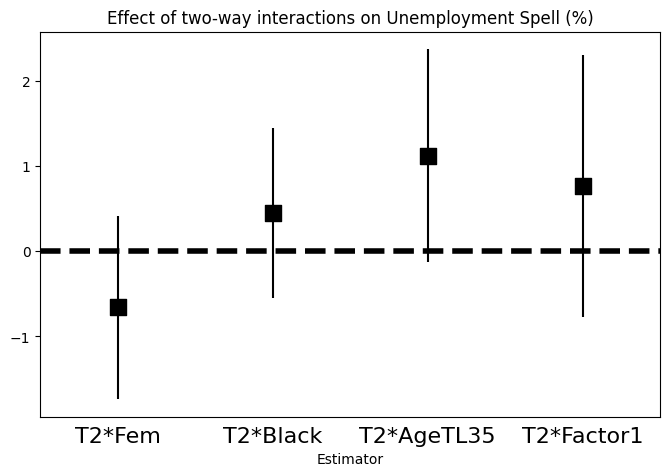

In [84]:
fig, ax = plt.subplots(figsize=(8, 5))
coefs_ira.plot(x='Variable', y='Coefficient', kind='bar', 
             ax=ax, color='none', 
             yerr='Interval', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coefs_ira.shape[0]), 
           marker='s', s=120, 
           y=coefs_ira['Coefficient'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2*Fem', 'T2*Black', 'T2*AgeTL35', 'T2*Factor1'], 
                       rotation=0, fontsize=16)
plt.xlabel('Estimator')
plt.title('Effect of two-way interactions on Unemployment Spell (%)')
plt.show()

Remember that, in general, we found that the program has a negative effect on the length of unemployment. However, here we can notice that the treatment effect may vary depending on certain characteristics of the sample. If the unemployed person is female, then receiving the treatment still has a negative effect on the period of unemployment, but this does not remain true when the person is black, or their age is below 35. Being part of these latter groups, and receiving the treatment may in fact have a positive effect on the length of unemployment. Though we must remember that this differentiated effect is only significant for the group of age below 35.